# Assignment decision tree Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"



In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [190]:
# import some data to play with
fraud = pd.read_csv('c:/users/mahesh/datasetcsv/fraud_check.csv')

In [191]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [192]:
label_encoder = preprocessing.LabelEncoder()
fraud['Undergrad']= label_encoder.fit_transform(fraud['Undergrad']) 

In [193]:
fraud['Marital.Status']= label_encoder.fit_transform(fraud['Marital.Status']) 

In [194]:
fraud['Urban']= label_encoder.fit_transform(fraud['Urban']) 

In [195]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [196]:
fraud['des'] = np.where((fraud.iloc[:, 2] <30000) , "good","risky")


In [197]:
fraud.head(100)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,des
0,0,2,68833,50047,10,1,risky
1,1,0,33700,134075,18,1,risky
2,0,1,36925,160205,30,1,risky
3,1,2,50190,193264,15,1,risky
4,0,1,81002,27533,28,0,risky
...,...,...,...,...,...,...,...
95,1,2,41395,121498,28,1,risky
96,0,2,22258,63622,17,0,good
97,1,0,79583,37849,19,1,risky
98,1,1,22187,77053,18,1,good


In [198]:
x=fraud.iloc[:,0:6]
y=fraud['des']

In [199]:

x

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


<AxesSubplot:>

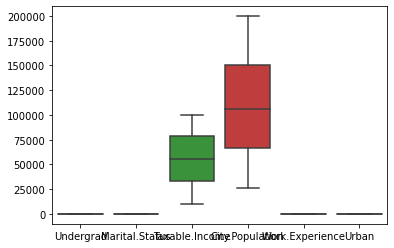

In [200]:
sns.boxplot(data=fraud)

In [201]:
y

0      risky
1      risky
2      risky
3      risky
4      risky
       ...  
595    risky
596    risky
597    risky
598    risky
599    risky
Name: des, Length: 600, dtype: object

In [202]:
fraud['des'].unique()    


array(['risky', 'good'], dtype=object)

In [203]:
fraud.des.value_counts()


risky    476
good     124
Name: des, dtype: int64

In [204]:
colnames = list(fraud.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'des']

In [207]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=1)

### Building Decision Tree Classifier using Entropy Criteria

In [208]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=500)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=500)

[Text(167.4, 163.07999999999998, 'X[2] <= 30055.5\nentropy = 0.741\nsamples = 420\nvalue = [88, 332]'),
 Text(83.7, 54.360000000000014, 'entropy = 0.0\nsamples = 88\nvalue = [88, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 0.0\nsamples = 332\nvalue = [0, 332]')]

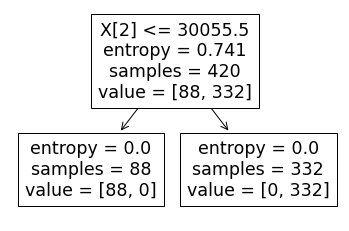

In [209]:
#PLot the decision tree
tree.plot_tree(model)

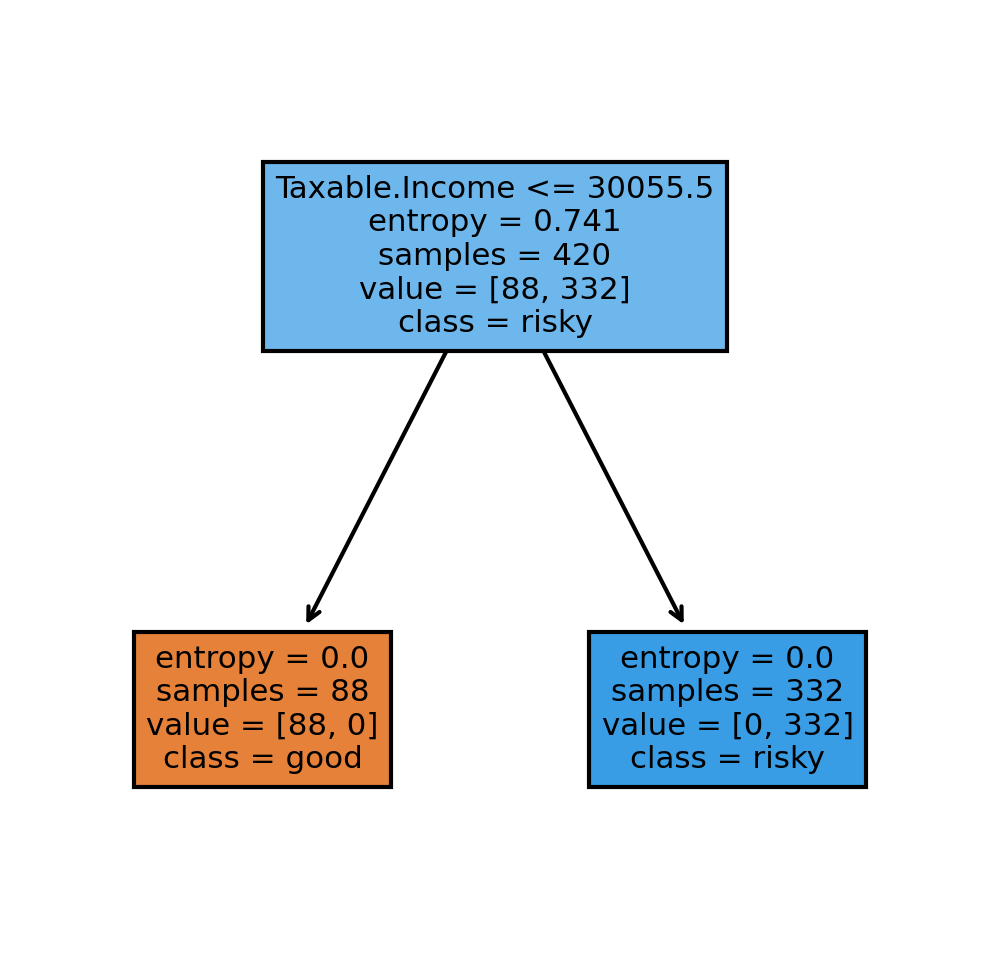

In [210]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [211]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

risky    144
good      36
dtype: int64

In [212]:
preds

array(['good', 'risky', 'good', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'good', 'risky', 'risky',
       'good', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'good', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'risky', 'risky', 'risky', 'good',
       'risky', 'risky', 'risky', 'good', 'risky', 'good', 'risky',
       'risky', 'good', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'good', 'risky', 'risky', 'risky', 'risky', 'risky',
       'good', 'risky', 'risky', 'risky', 'risky', 'risky', 'risky',
       'risky', 'risky', 'risky', 'good', 'good', 'risky', 'risky',
       'good', 'risky', 'risky', 'good', 'risky', 'risky', 'good', 'good',
       'risky', 'risky', 'risky', 'good', 'good', 'risky', 'good',
       'risky', 'risky', 'risky', 'good', 'risky', 'risky', 'risky',
       'good', 'risky', 'risky',

In [213]:
# Accuracy 
np.mean(preds==y_test)

1.0

### Building Decision Tree Classifier (CART) using Gini Criteria

In [214]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=50)

In [215]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50)

In [216]:
#Prediction and computing the accuracy
predg=model_gini.predict(x_test)
np.mean(predg==y_test)#Prediction and computing the accuracy
pred1=model_gini.predict(x_test)
np.mean(pred1==y_test)

1.0

[Text(167.4, 163.07999999999998, 'X[2] <= 30055.5\ngini = 0.331\nsamples = 420\nvalue = [88, 332]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 88\nvalue = [88, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 332\nvalue = [0, 332]')]

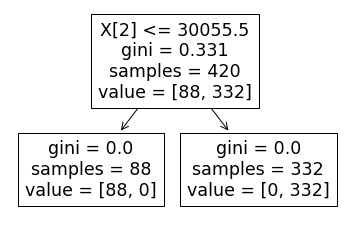

In [217]:
#PLot the decision tree
tree.plot_tree(model_gini)

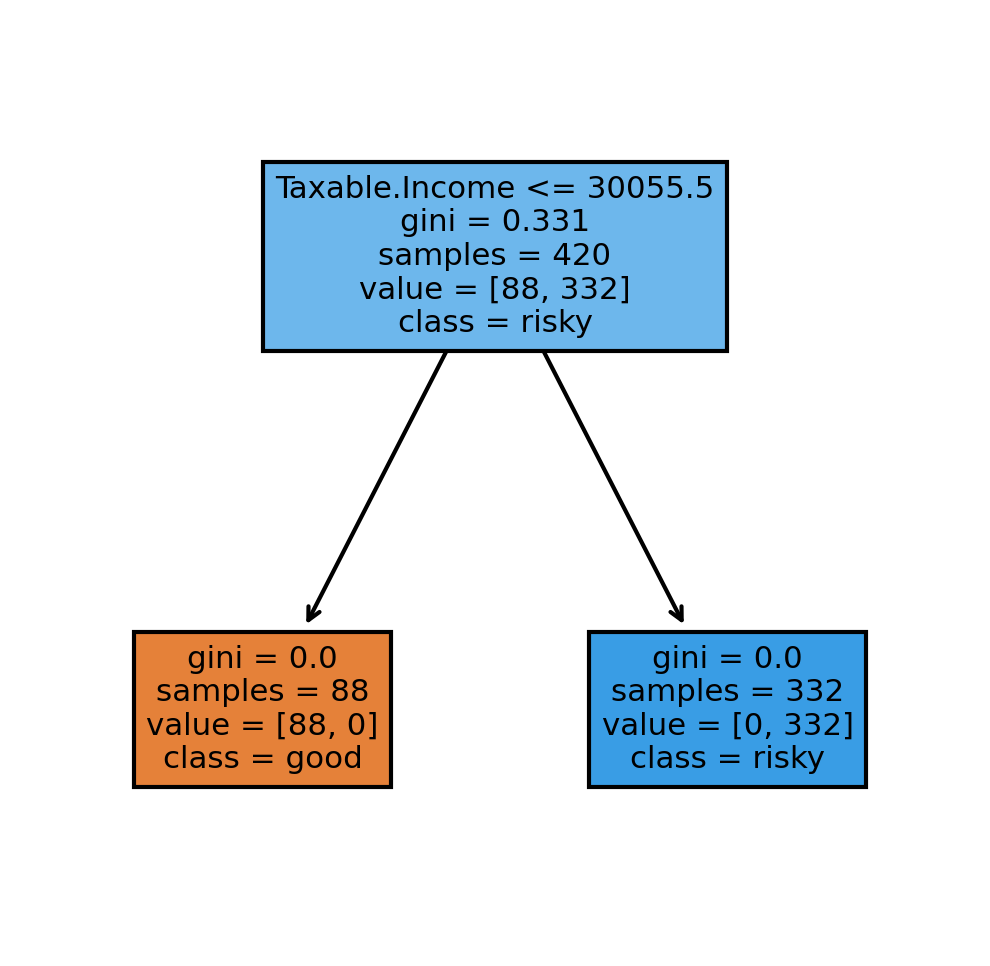

In [218]:
fn=['Undergrad','Marital.Status','Taxable.Income','City.Population','Work.Experience','Urban']
cn=['good', 'risky']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

#### Decision Tree Regression Example

In [219]:
fraud['regres'] = np.where(fraud['Taxable.Income']>30000,1,0)

In [220]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,des,regres
0,0,2,68833,50047,10,1,risky,1
1,1,0,33700,134075,18,1,risky,1
2,0,1,36925,160205,30,1,risky,1
3,1,2,50190,193264,15,1,risky,1
4,0,1,81002,27533,28,0,risky,1
...,...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,risky,1
596,1,0,69967,55369,2,1,risky,1
597,0,0,47334,154058,0,1,risky,1
598,1,1,98592,180083,17,0,risky,1


In [221]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [222]:
array = fraud.values
X = array[:,0:5]
y = array[:,7]

In [223]:
X

array([[0, 2, 68833, 50047, 10],
       [1, 0, 33700, 134075, 18],
       [0, 1, 36925, 160205, 30],
       ...,
       [0, 0, 47334, 154058, 0],
       [1, 1, 98592, 180083, 17],
       [0, 0, 96519, 158137, 16]], dtype=object)

In [224]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [226]:
model_reg = DecisionTreeRegressor()
model_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [227]:
model_reg.score(X_test,y_test)

1.0

In [228]:
model_reg.score(X_train, y_train)



1.0

# Inference:  There is no outlier .Decision tree with entropy, gini and logistic reggressor models  is 100 % accurate  in predicting the fraud data with reference to  income. Taxable income is a root  node and it has purely classified the data with entropy zero 
